In [0]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
# Set numeric type to float32 from uint8
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [0]:
# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

In [0]:
# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [0]:
# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1) 

In [0]:
from keras.models import Sequential
from keras import models, layers
import keras

In [0]:
#Instantiate an empty model
model = Sequential()

In [0]:
#C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28,28,1), padding="same"))

In [0]:
# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

In [0]:
# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))

In [0]:
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

In [0]:
# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

In [0]:
# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation='tanh'))

In [0]:
#Output Layer with softmax activation
model.add(layers.Dense(10, activation='softmax'))

In [0]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"]) 

In [0]:
hist = model.fit(x=x_train,y=y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), verbose=1) 

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/50





60000/60000 [==============================] - 19s 314us/step - loss: 0.7069 - acc: 0.8232 - val_loss: 0.3486 - val_acc: 0.9041
Epoch 2/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.3177 - acc: 0.9091 - val_loss: 0.2686 - val_acc: 0.9228
Epoch 3/50
60000/60000 [==============================] - 3s 48us/step - loss: 0.2582 - acc: 0.9261 - val_loss: 0.2263 - val_acc: 0.9350
Epoch 4/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.2220 - acc: 0.9369 - val_loss: 0.1980 - val_acc: 0.9446
Epoch 5/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1956 - acc: 0.9441 - val_loss: 0.1779 - val_acc: 0.9476
Epoch 6/50
60000/60000 [==============================] - 3s 47us/step - loss: 0.1751 - acc: 0.9500 - val_loss: 0.1594 - val_acc: 0.9553
Epoch 7/50
60000/60000 [

Text(0, 0.5, 'acc')

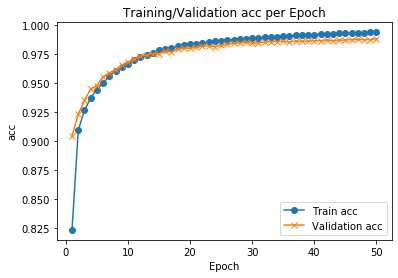

In [0]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['acc'], 'o-')
ax.plot([None] + hist.history['val_acc'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc') 

Text(0, 0.5, 'Loss')

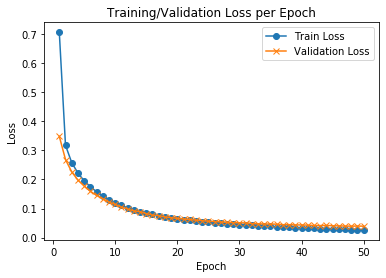

In [0]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss') 